In [1]:
import random
import matplotlib.pyplot
import numpy
import scipy.special
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

# zipf distribution Generator

In [2]:
class zipf_generator:
    def __init__(self,alpha = 1, number = 1000):
        self.alpha = alpha
        self.number = number
    def reset(self, alpha = 1, number = 1000):
        self.alpha = alpha
        self.number = number
    def calculateSum(self):
        self.numbers = [i for i in range(1,self.number+1)]
        self.numbers_prob = [(float(1/i)**self.alpha) for i in self.numbers]
        self.sum = sum(self.numbers_prob)
    def generate(self):
        self.calculateSum()
        zipf_dis = np.array(self.numbers_prob)/self.sum
        return self.numbers,zipf_dis
        #plt.plot(self.numbers,self.zipf)

In [33]:
numOfContent = 100
zipf = zipf_generator(alpha = 1,number = numOfContent)
numbers, zipf1 = zipf.generate()
zipf.reset(alpha = 0.9, number = numOfContent)
*_,zipf2 = zipf.generate()
zipf.reset(alpha = 0.7,number = numOfContent)
*_,zipf3 = zipf.generate()
zipf.reset(alpha = 0.5, number = numOfContent)
*_,zipf4 = zipf.generate()

In [3]:
def toMassFunc(prob):
    ret = [prob[0]]
    for i in range(1,len(prob)):
        ret.append(ret[-1]+prob[i])
    return ret

plt.figure(num=4,figsize=(8,5))
plt.plot([0]+numbers,np.insert(zipf1,0,0),label = 'alpha = 1')
plt.plot([0]+numbers,np.insert(zipf2,0,0), label = 'alpha = 0.9')
plt.plot([0]+numbers,np.insert(zipf3,0,0),label = 'alpha = 0.7')
plt.plot([0]+numbers,np.insert(zipf4,0,0),label = 'alpha = 0.5')
plt.legend(title = 'zipf parameter :')
plt.title('Zipf distribution')
plt.show()

zipf1 = toMassFunc(zipf1)
zipf2 = toMassFunc(zipf2)
zipf3 = toMassFunc(zipf3)
zipf4 = toMassFunc(zipf4)

plt.figure(num=4,figsize=(8,5))
plt.plot([0]+numbers,np.insert(zipf1,0,0),color = 'yellow',linewidth = 1, marker = 'o', linestyle = 'solid',label = 'alpha = 1')
plt.plot([0]+numbers,np.insert(zipf2,0,0),color='red',linewidth = 1, marker = 'P', linestyle = 'dashed',label = 'alpha = 0.9')
plt.plot([0]+numbers,np.insert(zipf3,0,0),color='green',linewidth = 1, marker = '*', linestyle = 'dotted',label = 'alpha = 0.7')
plt.plot([0]+numbers,np.insert(zipf4,0,0),color='blue',linewidth = 1, marker = '^', linestyle = 'dashdot',label = 'alpha = 0.5')
plt.legend(title = 'zipf parameter :')
plt.title('Zipf distribution')
plt.show()

In [4]:
def gen_zipf_requests(alpha = 1,number_of_content = 100, number_of_request = 1000):
    zipf_gen = zipf_generator(alpha = alpha,number = number_of_content)
    contents, zipf_distrib = zipf_gen.generate()
    assert len(zipf_distrib) == number_of_content
    #number_of_content = len(zipf)
    req = []
    pattern = {}
    for i,content in enumerate(contents):
        req+=([str(content)]*int(round(number_of_request*zipf_distrib[i],0)))
        pattern[content] = int(round(number_of_request*zipf_distrib[i],0))
    shuffle(req)
    return req, pattern

In [35]:
def gen_biased_zipf_requests(alpha = 1,number_of_content = 100, number_of_request = 1000, offset = 0):
    zipf_gen = zipf_generator(alpha = alpha,number = number_of_content)
    contents, zipf_distrib = zipf_gen.generate()
    assert len(zipf_distrib) == number_of_content
    #number_of_content = len(zipf)
    req = []
    pattern = {}
    for i,content in enumerate(contents):
        req+=([(content+offset)%number_of_content]*int(round(number_of_request*zipf_distrib[i],0)))
        pattern[(content+offset)%number_of_content] = int(round(number_of_request*zipf_distrib[i],0))
    shuffle(req)
    pattern = dict(sorted(pattern.items(), key = lambda item: item[0]))
    return req, pattern

In [31]:
def gen_bilateral_biased_zipf_requests(alpha = 1,number_of_content = 100, number_of_request = 1000, offset = 0):
    zipf_gen = zipf_generator(alpha = alpha,number = number_of_content//2)
    
    contents, zipf_distrib = zipf_gen.generate()
    assert len(zipf_distrib) == number_of_content//2
    #number_of_content = len(zipf)
    req = []
    pattern = {}
    for i,content in enumerate(contents):
        req+=([(content+offset+number_of_content//2)%number_of_content]*int(round(number_of_request*zipf_distrib[i],0)))
        req+=([(-content+1+offset+number_of_content//2)%number_of_content]*int(round(number_of_request*zipf_distrib[i],0)))
        pattern[(content+offset+number_of_content//2)%number_of_content] = int(round(number_of_request*zipf_distrib[i],0))
        pattern[(-content+1+offset+number_of_content//2)%number_of_content] = int(round(number_of_request*zipf_distrib[i],0))
    shuffle(req)
    pattern = dict(sorted(pattern.items(), key = lambda item: item[0]))
    return req, pattern

# This is to give an API for request generating

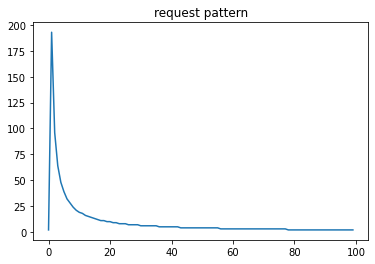

In [40]:
req_10000, pattern = gen_biased_zipf_requests(alpha = 1,number_of_content = 100, number_of_request = 1000, offset = 0)
plt.plot(pattern.keys(), pattern.values())
plt.title('request pattern')
plt.show()